# Get the Sage data from Beehive using sage_data_client.


- Documnetation for accesing the data. https://docs.sagecontinuum.org/docs/tutorials/accessing-data
- Sage data client https://github.com/sagecontinuum/sage-data-client (Check examples directory.)
- pypi link https://pypi.org/project/sage-data-client/

Install sage-data-client using pip.

`pip install sage-data-client`


In [45]:
import sage_data_client
import pandas as pd

### 1. To get the measured values or data from the pluings use `sage_data_client.query()`. It will return a dataframe.

In [46]:
df = sage_data_client.query(
    start="20220914-00:00:40",
    end="20220915-23:59:59",
    filter={
        "plugin": "*",
        "name": "env.coverage.cloud",
        "vsn" : "W021"
        #"sensor": "mobotix"
    }
)

Use Sage data portal to get the above information of the node, availability of the data and variable names.
For ARM W021 node you can check all info at https://portal.sagecontinuum.org/node/000048B02D15BC77 

In [47]:
df

,timestamp,name,value,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn
0,2022-09-14 01:14:02.926738944+00:00,env.coverage.cloud,0.761622,000048b02d15bc77.ws-nxcore,cloud-cover-top,000048b02d15bc77,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W021
1,2022-09-14 02:19:11.056365312+00:00,env.coverage.cloud,0.997878,000048b02d15bc77.ws-nxcore,cloud-cover-top,000048b02d15bc77,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W021
2,2022-09-14 03:21:09.546897152+00:00,env.coverage.cloud,0.998267,000048b02d15bc77.ws-nxcore,cloud-cover-top,000048b02d15bc77,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W021
3,2022-09-14 04:21:42.293035520+00:00,env.coverage.cloud,0.996333,000048b02d15bc77.ws-nxcore,cloud-cover-top,000048b02d15bc77,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W021
4,2022-09-14 05:26:14.077267200+00:00,env.coverage.cloud,0.997656,000048b02d15bc77.ws-nxcore,cloud-cover-top,000048b02d15bc77,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W021
...,...,...,...,...,...,...,...,...,...
2776,2022-09-15 23:56:58.740190208+00:00,env.coverage.cloud,0.584133,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-cloudcover-unet:0.0.1,cloudcover-top,W021
2777,2022-09-15 23:58:01.382891008+00:00,env.coverage.cloud,0.555833,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-cloudcover-unet:0.0.1,cloudcover-top,W021
2778,2022-09-15 23:59:04.021829376+00:00,env.coverage.cloud,0.533122,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-cloudcover-unet:0.0.1,cloudcover-top,W021
2779,2022-09-14 07:30:42.330007040+00:00,env.coverage.cloud,0.997778,000048b02d15bc77.ws-nxcore,NaN,000048b02d15bc77,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W021


<AxesSubplot:xlabel='timestamp'>

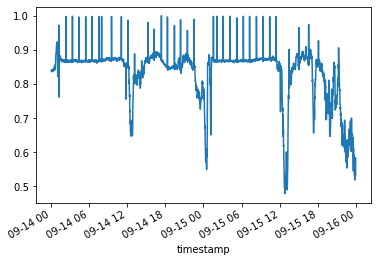

In [48]:
df.set_index("timestamp").value.plot()

### 2. For downloading data files such as images, sounds or videos.

In [49]:
df = sage_data_client.query(
    #start="20220925-00:00:40",
    #end="20220927-06:59:59",
    start="-1h",
    filter={
        "plugin": "waggle/plugin-image-sampler.*",
        "name": "*",
        "vsn" : "W021"
        #"sensor": "mobotix"
    }
)

The returned dataframe contains relavant information and the `value` field contains url for downloading the files.
Individual images can be filtered using metadata.

In [51]:
df

,timestamp,name,value,meta.filename,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn
0,2022-09-27 15:23:43.305006058+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-bottom,W021
1,2022-09-27 15:24:51.354326299+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-bottom,W021
2,2022-09-27 15:25:58.106863572+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-bottom,W021
3,2022-09-27 15:26:59.499804221+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-bottom,W021
4,2022-09-27 15:28:00.843202550+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-bottom,W021
...,...,...,...,...,...,...,...,...,...,...
112,2022-09-27 16:18:27.628972784+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-top,W021
113,2022-09-27 16:19:16.283220519+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-top,W021
114,2022-09-27 16:20:05.623036722+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-top,W021
115,2022-09-27 16:20:54.588085694+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,sample.jpg,000048b02d15bc77.ws-nxcore,sage,000048b02d15bc77,waggle/plugin-image-sampler:0.2.5,imagesampler-top,W021


### 3. Alternately, you can use https://portal.sagecontinuum.org/data-browser?nodes=W021 to select the data.
It will show the sample of the data and provide the curl command for downloading the files. 

`curl https://data.sagecontinuum.org/api/v1/query -d '{"start":"2022-09-27T11:00:00Z","end":"2022-09-27T12:00:00.000Z","filter":{"plugin":"waggle/plugin-image-sampler.*","vsn":"W021"}}'`
